<a href="https://colab.research.google.com/github/mrhamedani/Deep-learning-projects-Tensorflow/blob/main/7_flowers_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation
is a technique in machine learning and deep learning used to increase the diversity of training data without collecting new samples. It helps improve model performance and prevent overfitting.

Common Data Augmentation Techniques

🔹 For Images:
 Rotation
 Cropping & Resizing
 Brightness & Contrast Adjustment
 Adding Noise

🔹 For Text:
 Synonym Replacement
 Word Insertion or Deletion
 Shuffling Word Order

🔹 For Audio:
 Time Stretching
 Adding Background Noise
 Changing Frequency

These techniques help the model generalize better by exposing it to more varied data.









In [36]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt



In [37]:
(train_ds,valid_ds,test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info=True,    # Additional information about the dataset Send in the metadata
    as_supervised=True,)

In [39]:
# num_classes = metadata.features['label'].num_classes
# print(metadata.features['label'].names)

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


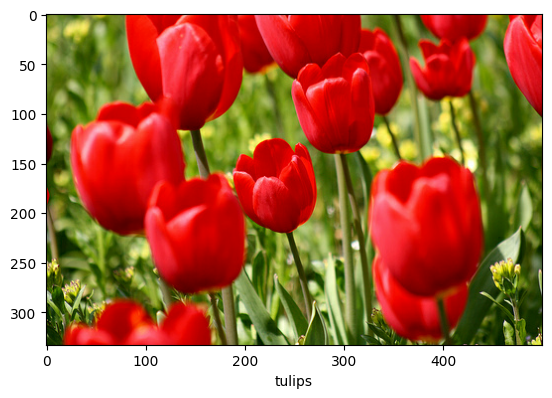

In [40]:
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))

plt.imshow(image)
plt.xlabel(get_label_name(label))
plt.show()

For **Data Augmentation**, both **`tf.image`** and **Keras layers (`tf.keras.layers`)** can be used. The **`tf.image`** module provides more control over the augmentation process, while Keras layers offer a simpler and more integrated implementation within the model.

In [55]:
img_size = 500            #resize image to 180x180 & scale to [0,1]
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_size, img_size),
    tf.keras.layers.Rescaling(1./255)])

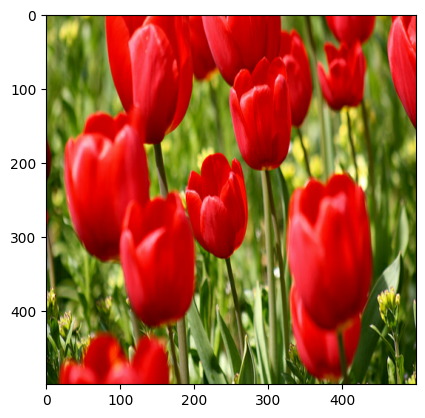

In [56]:
result= resize_and_rescale(image)
plt.imshow(result)
plt.show()

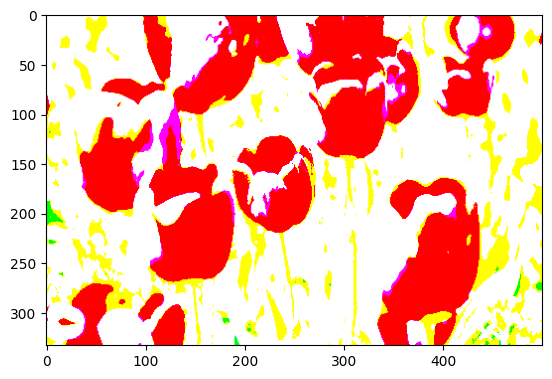

In [57]:
data_augmentation= tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),])
augmented_image = data_augmentation(tf.expand_dims(image, axis=0))  # Add batch dimension
plt.imshow(tf.squeeze(augmented_image))  # Remove extra dimension for visualization
plt.show()

In [61]:
aug_set = train_ds.map(lambda x, y: (resize_and_rescale(x), y)) # Apply transformations to the dataset
